# Batch run resultaten

In deze sectie analyseren we de resultaten van onze batch runs waarin twee verkeerslichtstrategieën worden vergeleken:

- Auction-based traffic lights

- Fixed cycle traffic lights

We onderzoeken hoe deze strategieën presteren onder verschillende omstandigheden van verkeersdrukte en voertuigsnelheden. De focus ligt met name op de gemiddelde wachttijd en de doorstroming van voertuigen op het kruispunt.

De inzichten uit deze analyses helpen ons te bepalen welke strategie het meest efficiënt is in het verminderen van wachttijden en het verbeteren van de algemene verkeersdoorstroom.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [6]:
df = pd.read_csv("intersection_sim/combined_batch_results.csv")

# Bekijk de eerste paar rijen
df.head()

,RunId,iteration,Step,width,height,num_lanes,light_strategy,traffic_condition,car_speed,TrafficFlowPerInterval,AverageWaitingTime
0,0,0,0,20,20,1,auction,Normale tijd,2,0,0.0
1,0,0,1,20,20,1,auction,Normale tijd,2,0,0.0
2,0,0,2,20,20,1,auction,Normale tijd,2,0,0.0
3,0,0,3,20,20,1,auction,Normale tijd,2,0,0.0
4,0,0,4,20,20,1,auction,Normale tijd,2,0,0.0


We beginnen met een verkennende analyse van het gegenereerde batch run bestand.

- df.info() geeft ons inzicht in het aantal rijen, kolommen en datatypes van elke kolom.

- df.describe() toont statistische samenvattingen van de numerieke kolommen, zoals het gemiddelde, minimum en maximum.

Tot slot bekijken we met df["light_strategy"].unique() welke verkeerslichtstrategieën in de simulatie zijn getest. Deze verkenning helpt ons te begrijpen hoe de data is opgebouwd voordat we diepere analyses uitvoeren

In [7]:
df.info()
df.describe()
df["light_strategy"].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180360 entries, 0 to 180359
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   RunId                   180360 non-null  int64  
 1   iteration               180360 non-null  int64  
 2   Step                    180360 non-null  int64  
 3   width                   180360 non-null  int64  
 4   height                  180360 non-null  int64  
 5   num_lanes               180360 non-null  int64  
 6   light_strategy          180360 non-null  object 
 7   traffic_condition       180360 non-null  object 
 8   car_speed               180360 non-null  int64  
 9   TrafficFlowPerInterval  180360 non-null  int64  
 10  AverageWaitingTime      180360 non-null  float64
dtypes: float64(1), int64(8), object(2)
memory usage: 15.1+ MB


array(['auction', 'fixed_cycle', 'dutch_system'], dtype=object)

### Analyse van gemiddelde wachttijd per verkeerslichtstrategie

In deze cel berekenen we de gemiddelde wachttijd voor elke verkeerslichtstrategie. Dit geeft ons inzicht in welke strategie gemiddeld genomen efficiënter is in het verminderen van wachttijden.

Scenario 1 = Weinig verkeer + Lagesnelheid
Scenario 2 = Weinig verkeer + Hogesnelheid
Scenario 3 = Veel verkeer + Lagesnelheid
Scenario 4 = Veel verkeer + Hogesnelheid

In [18]:
df_scenario_1 = df.loc[(df['car_speed'] == 2) & (df['traffic_condition'] == "Normale tijd") ]
df_scenario_2 = df.loc[(df['car_speed'] == 5) & (df['traffic_condition'] == "Normale tijd") ]
df_scenario_3 = df.loc[(df['car_speed'] == 2) & (df['traffic_condition'] == "Spitsuur") ]
df_scenario_4 = df.loc[(df['car_speed'] == 5) & (df['traffic_condition'] == "Spitsuur") ]

### Vergelijking van gemiddelde wachttijd voor scenario 1 ()

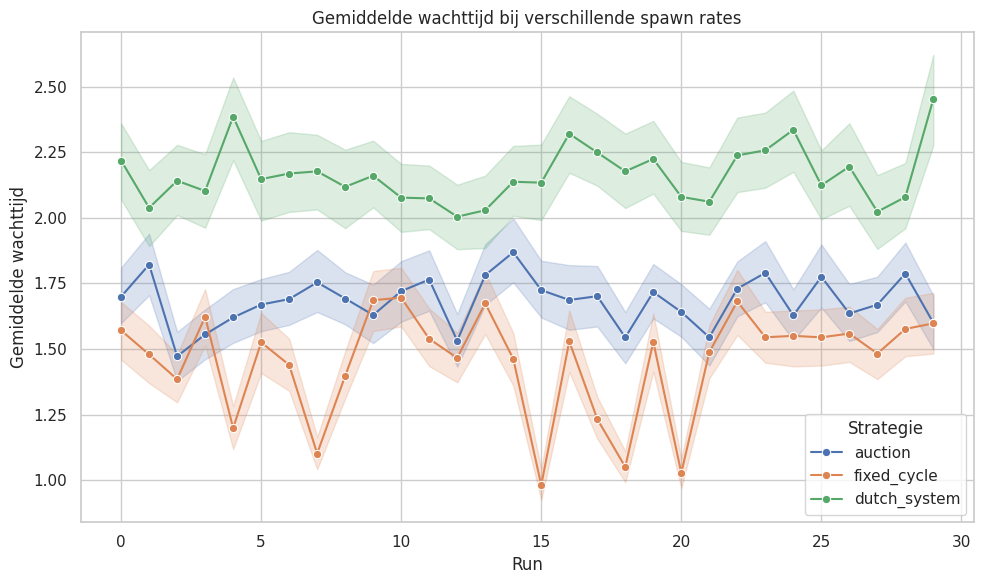

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_scenario_1, x="iteration", y="AverageWaitingTime", hue="light_strategy", marker="o")
plt.title("Gemiddelde wachttijd bij verschillende spawn rates")
plt.ylabel("Gemiddelde wachttijd")
plt.xlabel("Run")
plt.legend(title="Strategie")
plt.tight_layout()
plt.show()

We zien dat de strategie met een vaste cyclus in alle gevallen een iets lagere gemiddelde wachttijd oplevert dan de veilingstrategie.
Vooral bij hogere spawn rates (drukker verkeer) is het verschil duidelijk zichtbaar.
Mogelijk komt dit doordat het auction-systeem bij toenemende verkeersdrukte minder voorspelbaar wordt en voertuigen vaker moeten wachten.

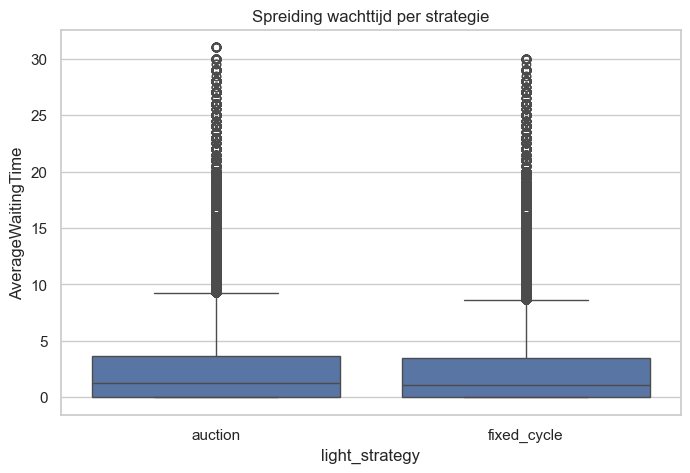

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="light_strategy", y="AverageWaitingTime")
plt.title("Spreiding wachttijd per strategie")
plt.show()

Beide strategieën tonen een vergelijkbare mediane wachttijd, maar de spreiding (en het aantal uitschieters) bij de auction-strategie is duidelijk groter.
Dit betekent dat de prestaties van het auction-systeem minder consistent zijn, met vaker zeer hoge wachttijden voor sommige voertuigen.

Conclusie: Hoewel het auction-systeem soms goed kan werken, is het minder voorspelbaar en kan het leiden tot langere wachttijden voor individuele voertuigen.

In [8]:
df.groupby("light_strategy")["TrafficFlowPerInterval"].mean()

light_strategy
auction        0.213192
fixed_cycle    0.208894
Name: TrafficFlowPerInterval, dtype: float64

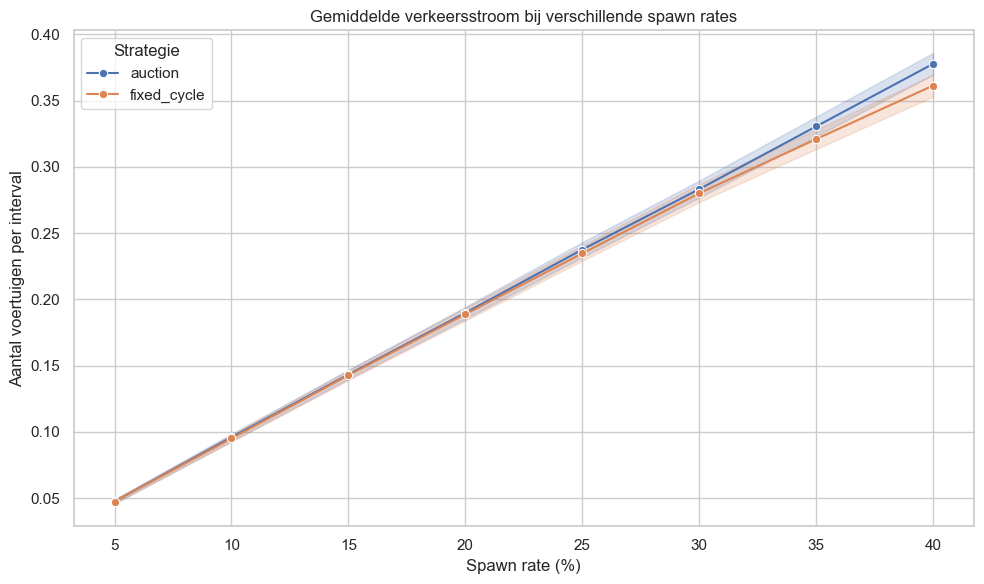

In [9]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="car_spawn_rate", y="TrafficFlowPerInterval", hue="light_strategy", marker="o")
plt.title("Gemiddelde verkeersstroom bij verschillende spawn rates")
plt.xlabel("Spawn rate (%)")
plt.ylabel("Aantal voertuigen per interval")
plt.legend(title="Strategie")
plt.tight_layout()
plt.show()